In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('cell_samples (1).csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.shape

(699, 11)

In [9]:
df.size

7689

In [11]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [12]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [14]:
malignant_df = df[df['Class']==4] [:200]
malignant_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
491,1119189,5,8,9,4,3,10,7,1,1,4
493,1142706,5,10,10,10,6,10,6,5,2,4
506,1286943,8,10,10,10,7,5,4,8,7,4
514,1306282,6,6,7,10,3,10,8,10,2,4


In [17]:
benign_df = df[df['Class']==2] [:200]
benign_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
355,857774,4,1,1,1,3,1,2,2,1,2
362,888169,3,2,2,1,4,3,2,1,1,2
363,888523,4,4,4,2,2,3,2,1,1,2
364,896404,2,1,1,1,2,1,3,1,1,2


In [19]:
# help(benign_df.plot)

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

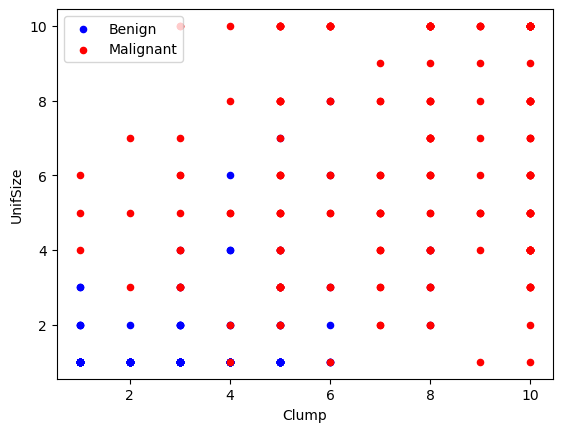

In [21]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

In [22]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [24]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

C:\Users\Hamza\AppData\Local\Temp\ipykernel_14508\2093585878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [25]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [27]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#Independent Variable
x = np.asarray(feature_df)

#Dependent Variable
y = np.asarray(df['Class'])


In [30]:
print(f"Independent Variables \n\n", x[0:5])

Independent Variables 

 [[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]


In [31]:
print(f"Dependent Variables \n\n", y[0:5])

Dependent Variables 

 [2 2 2 2 2]


In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y, train_size=0.2, random_state=2)

In [38]:
X_train.shape

(136, 9)

In [39]:
y_train.shape

(136,)

In [40]:
X_test.shape

(547, 9)

In [41]:
y_test.shape

(547,)

In [44]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       360
           4       0.91      0.98      0.94       187

    accuracy                           0.96       547
   macro avg       0.95      0.97      0.96       547
weighted avg       0.96      0.96      0.96       547



In [ ]:
'''
Precision = True Positive / True Postive + False Positive
          = True Positive / Total Predicted Positive


Accuracy = True Positive + True Negative / Total


Error Rate =         1 - Accuracy  
                         OR
          False Positive + False Negative / Total


Recall = True Positve / Actual Yes


F1 = 2 * (Precision * Recall / Precision + Recall)
'''